# Capítulo Técnico
## 1. Análisis descruptivo de la población

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importamos nuestro conjunto de datos
df = pd.read_csv('./datos/bank-full.csv', sep=';')

In [4]:
# Muestra arbitraría de registros en el set de datos bank-full
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
12863,34,blue-collar,divorced,secondary,no,368,no,yes,cellular,7,jul,2201,1,-1,0,unknown,no
3421,41,entrepreneur,divorced,tertiary,no,252,no,no,unknown,15,may,57,2,-1,0,unknown,no
41554,73,retired,married,unknown,no,739,no,no,cellular,11,sep,210,1,-1,0,unknown,yes
2346,32,technician,married,secondary,no,175,yes,no,unknown,13,may,142,1,-1,0,unknown,no
32417,32,blue-collar,married,primary,no,5511,no,no,cellular,16,apr,408,2,231,16,other,no


In [6]:
# Tipo de datos para cada columna y cantidad de datos, se observa que no existen valores nulos
# en una mirada inicial también se ve que el casteo de los datos es adecuado
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [44]:
print(f'Cantidad de valores nulos:\n{df.isnull().sum()}')

Cantidad de valores nulos:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [98]:
# Se posee un total de 45211 registros, además no se encuentran valores nulos en ninguna de las columnas
print('Principal ocupación de los clientes\n',pd.Series(df[df.y == 'yes'].job).value_counts()[:5])
# Las principales ocupaciones de los clientes  que aceptan las ofertas, van desde trabajar 
# como personal de gestión, luego técnicos, seguido por obreros, administradores y personas retiradas

Principal ocupación de los clientes
 job
management     1301
technician      840
blue-collar     708
admin.          631
retired         516
Name: count, dtype: int64


<Figure size 300x300 with 0 Axes>

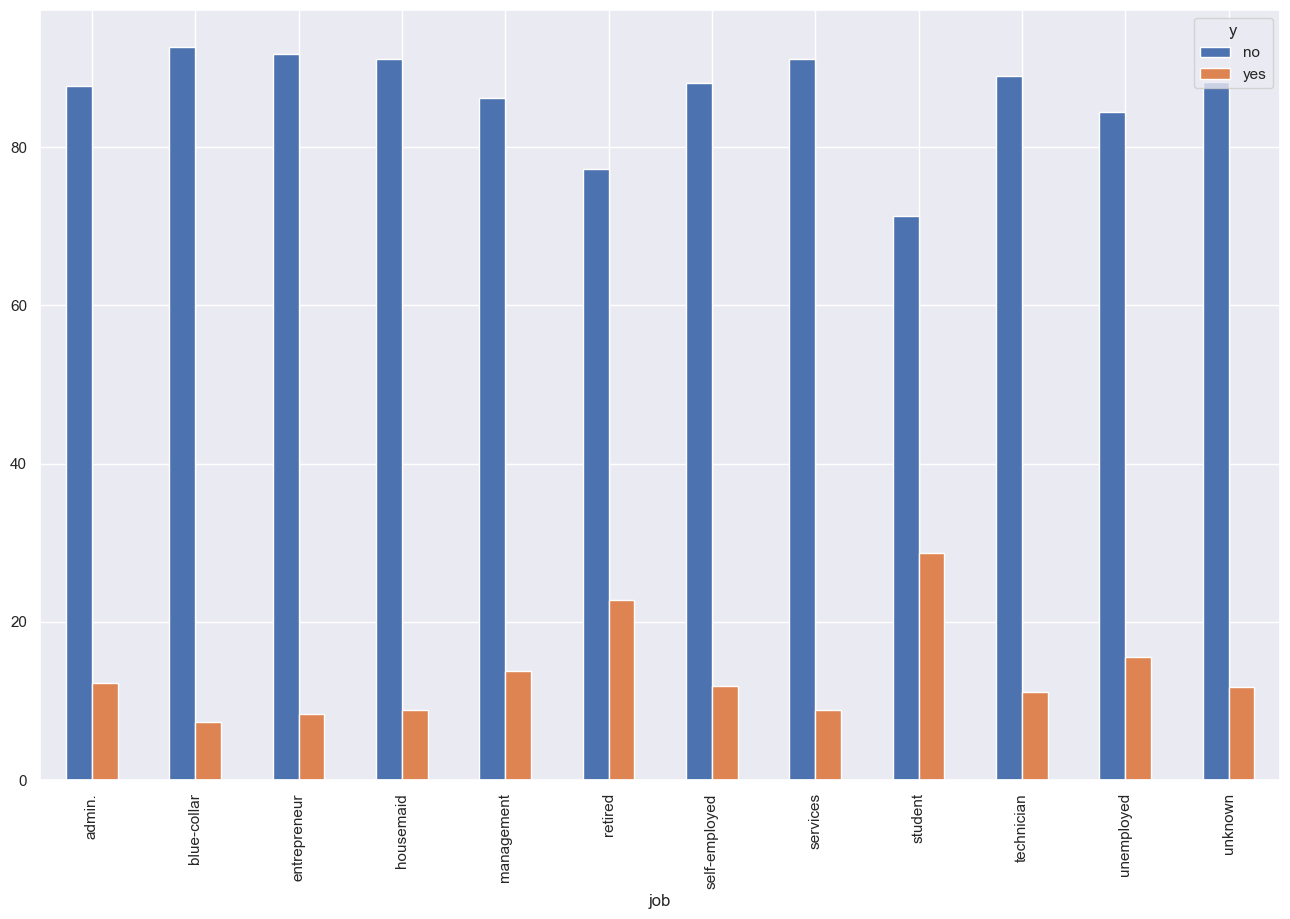

In [100]:
# En un gráfico de barras, podemos ver que dentro de los porcentajes mencionados anteriormente, para el principal
# grupo de trabajadores que es personal de gestión la minoría aceptaron la propuesta hecha por el banco, mientras
# que dentro del porcentaje de estudiantes, aunque menor en lo global que el personal de gestión, un número más
# significativo se motivo a aceptar la propuesta hecha por el banco 
plot = pd.crosstab(index=df['job'],
            columns=df['y']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

In [62]:
# Entre los clientes que han aceptado suscribirse al banco en las ofertas se encuentran principalmente
# personas casadas y en segundo lugar divorciados
print('Estado civil de los clientes:\n',pd.Series(df[df.y == 'yes'].marital).value_counts())

Estado civil de los clientes:
 marital
married     2755
single      1912
divorced     622
Name: count, dtype: int64


In [65]:
# Los meses con mayor número de clientes suscritos son mayo, seguido por agosto, luego jullio, abril y junio
# siendo estos los de mayor número por encima de los 500 clientes, es decir que en el verano hay mayor caso de éxito
print('Meses donde se hacen las atenciones con más compra de productos:\n',pd.Series(df[df.y=='yes'].month).value_counts())

Meses donde se hacen las atenciones con más compra de productos:
 month
may    925
aug    688
jul    627
apr    577
jun    546
feb    441
nov    403
oct    323
sep    269
mar    248
jan    142
dec    100
Name: count, dtype: int64


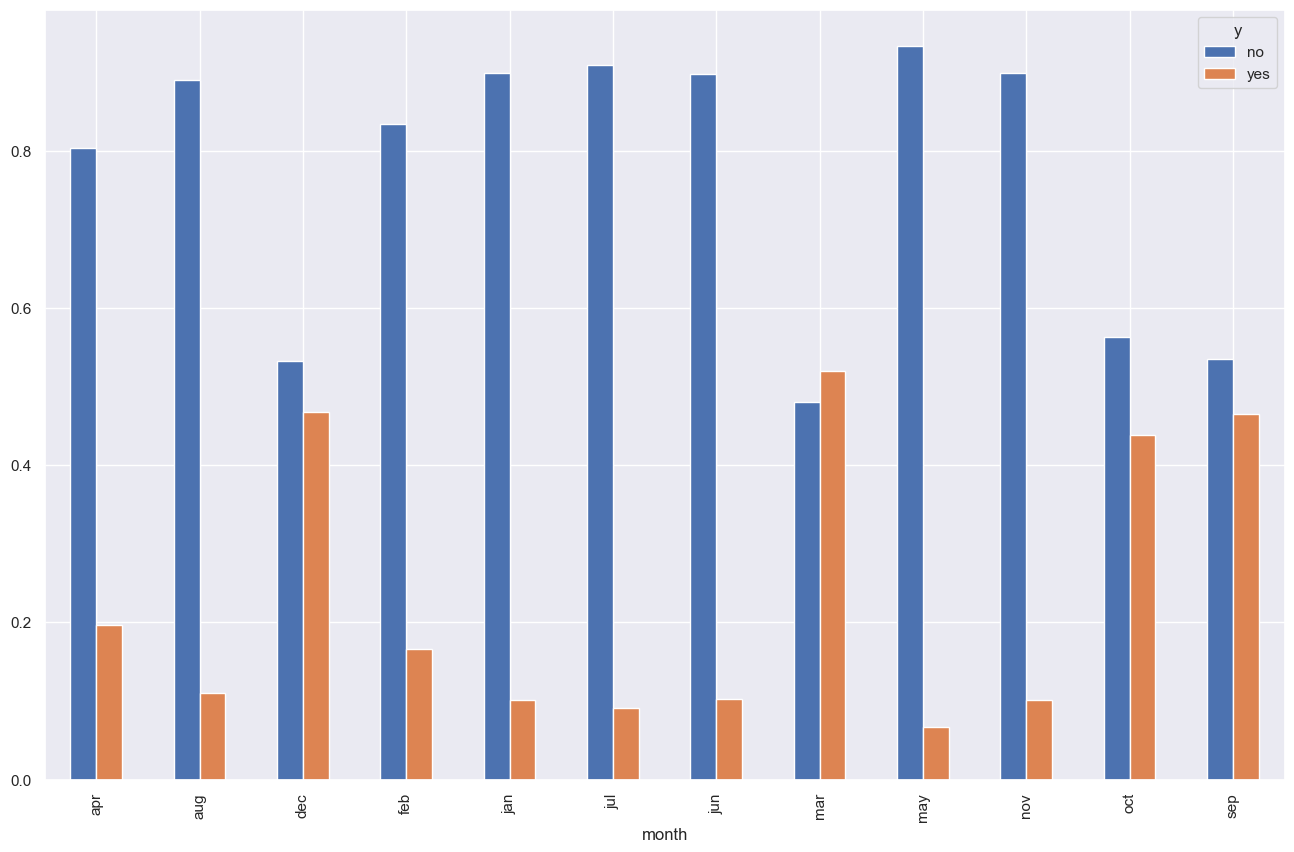

In [97]:
# Por otra parte, según la gráfica de barras siguiente, aunque marzo no es un mes donde hayan gran cantidad
# de clientes aceptando suscripción, en este mes es donde se cuenta con mayor seguridad de que los clientes aceptaran
plot = pd.crosstab(index=df['month'],
            columns=df['y']).apply(lambda r: r/r.sum()*100 ,
                                              axis=1).plot(kind='bar')

In [15]:
# selección de variables numéricas y categóricas para uso posterior en el tratamiento de datos
variables_numericas = df.select_dtypes(include=['int64'])
variables_categoricas = df.select_dtypes(exclude=['int64'])

<Axes: >

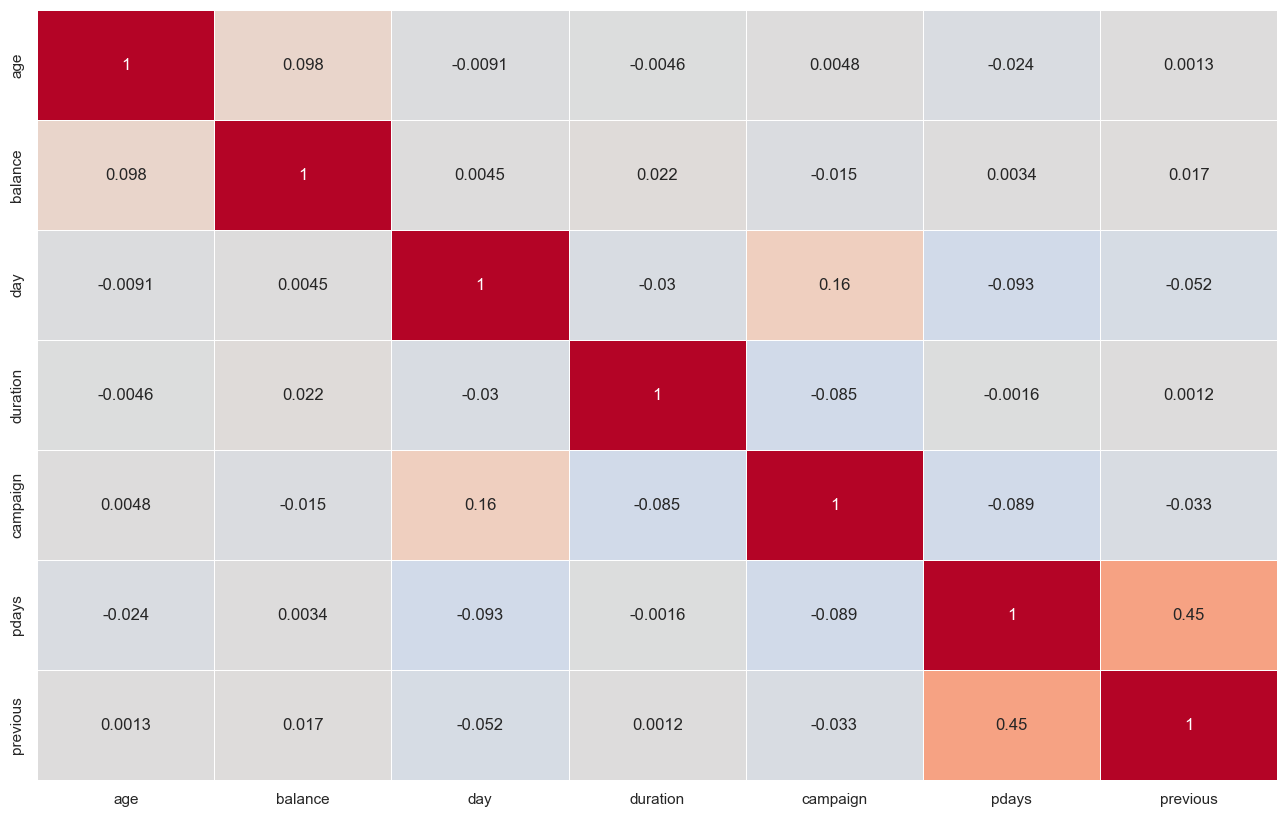

In [70]:
# No se observa un nivel alto de correlación entre variables, por lo cual todas las variables son independientes
# y por lo tanto no es necesario descartar ninguna columna
sns.set(rc={'figure.figsize':(16,10)})
sns.heatmap(df[variables_numericas.columns].corr(),annot=True, linewidths=0.5, center=0, cbar=False,cmap='coolwarm')

In [88]:
def show_distribution(var_data, name):
    '''
    Gráfica de distribuciones y medidas de tendencia central
    '''

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Mínimo gris:{:.2f}\nMedia cian:{:.2f}\nMediana rojo:{:.2f}\nModa amarillo:{:.2f}\nMáximo gris:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data, bins=30, color='skyblue', edgecolor='black', alpha=0.7, linewidth=1.2)
    ax[0].grid(axis='y', linestyle='--', alpha=0.7)
    ax[0].set_ylabel('Frecuencia')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    boxprops = dict(linestyle='--', linewidth=2, color='blue')
    whiskerprops = dict(linestyle='-', linewidth=2, color='red')
    medianprops = dict(linestyle='-', linewidth=2, color='green')
    flierprops = dict(marker='o', markersize=8, markerfacecolor='purple', markeredgecolor='black')

    ax[1].boxplot(var_data, vert=False, boxprops=boxprops, whiskerprops=whiskerprops, medianprops=medianprops, flierprops=flierprops)
    ax[1].set_xlabel('Valores')

    # Add a title to the Figure
    fig.suptitle(f'Distribución de los datos {name}')

    # Show the figure
    fig.show()

In [71]:
variables_numericas.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

Mínimo gris:18.00
Media cian:40.94
Mediana rojo:39.00
Moda amarillo:32.00
Máximo gris:95.00



C:\Users\diego\AppData\Local\Temp\ipykernel_6984\630508463.py:47: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


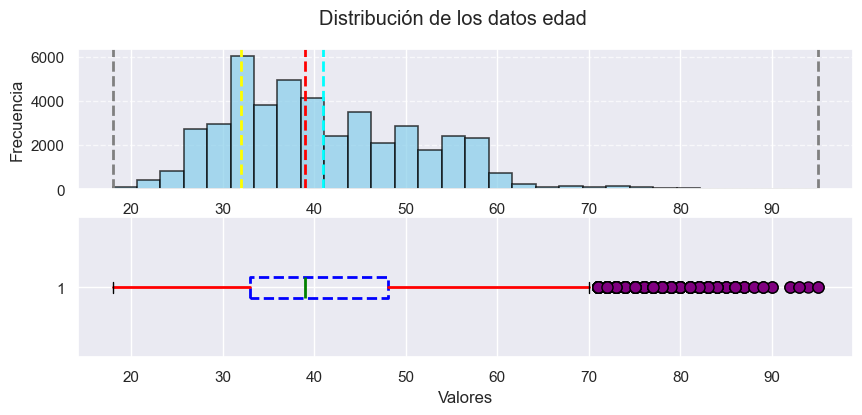

In [89]:
show_distribution(df['age'], 'edad')

Mínimo gris:1.00
Media cian:15.81
Mediana rojo:16.00
Moda amarillo:20.00
Máximo gris:31.00



C:\Users\diego\AppData\Local\Temp\ipykernel_6984\630508463.py:47: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


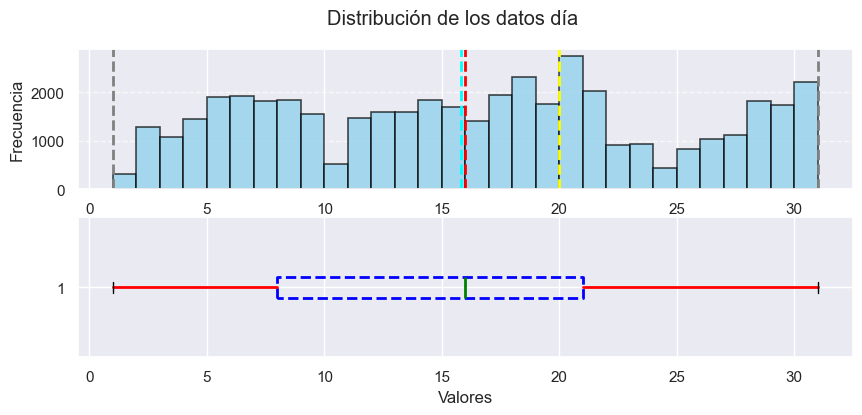

In [90]:
show_distribution(df['day'], 'día')

<Axes: title={'center': 'Análisis de previos vs pdays'}, xlabel='previous', ylabel='pdays'>

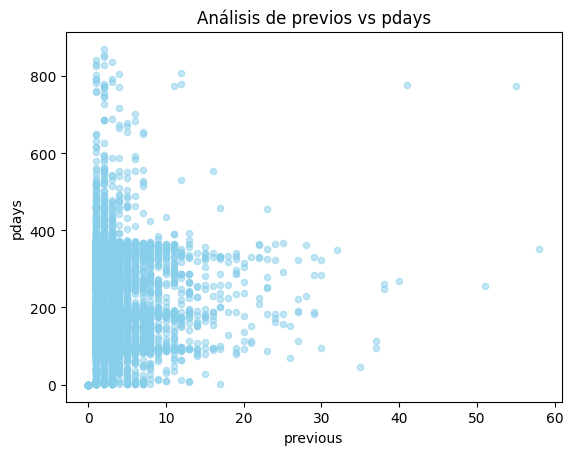

In [7]:
# Observemos la gráfica de dispersión entre las variables más correlacionadas pdays y previous
# según la información de los datos, pdays nos habla del número de días que pasaron desde la campaña anterior
# mientras previous la cantidad de veces que lo contactaron en la campaña anterior
# aunque la correlación es baja, es la más alta entre las demás variables y podemos interpretar
# el cúmulo central entre pdays 0-400 y previous 0-20, en el sentido de que a medida que 
# más llamadas se le hicieron a los clientes, la cantidad de tiempo que pasó en contactarse hasta la próxima
# campaña fue menor o normal, mientras para clientes que poco se les llamó pasaron más tiempo sin
# tener contacto con la nueva campaña, esto es razonable dado que pueden ser clientes que
# de entrada se negaron a la oferta o estrategia de venta
df[df.previous < 60].plot.scatter(title='Análisis de previos vs pdays', x='previous', y='pdays', color='skyblue', marker='o', alpha=0.5)

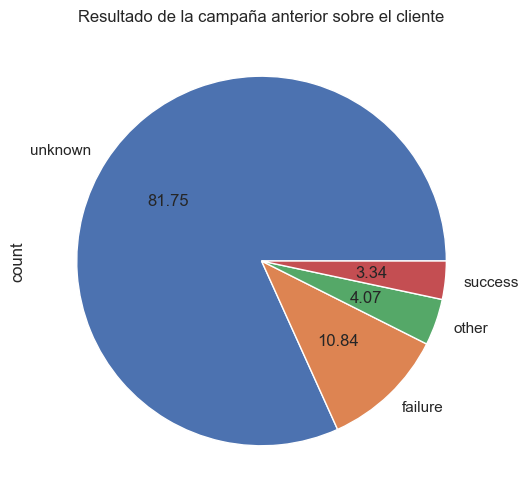

In [91]:
# Según el análisis de la campaña anterior, sobre la mayoría de clientes (81.75%) no se tiene conocimiento
# del impacto de dicha campaña, por otra parte el 10.84% de los clientes no los convenció y solo el 3.34% fueron convencidos
plot = df['poutcome'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='Resultado de la campaña anterior sobre el cliente')